# Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
df  = pd.DataFrame(data.data,columns = data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
x = df[['LSTAT']].values
y = data.target

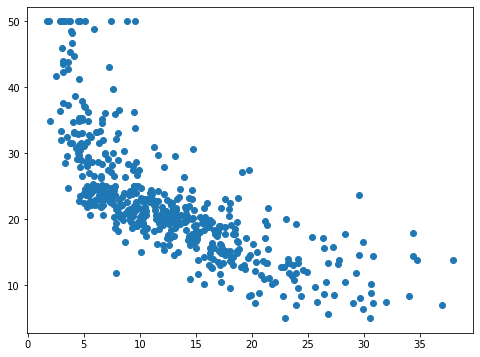

In [4]:
plt.figure(figsize = (8,6))
plt.scatter(x,y)

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([-1.5311271 , -1.02313731, -0.51514752, -0.00715773,  0.50083206,
         1.00882185,  1.51681165,  2.02480144,  2.53279123,  3.04078102,
         3.54877081]),
 <a list of 10 Patch objects>)

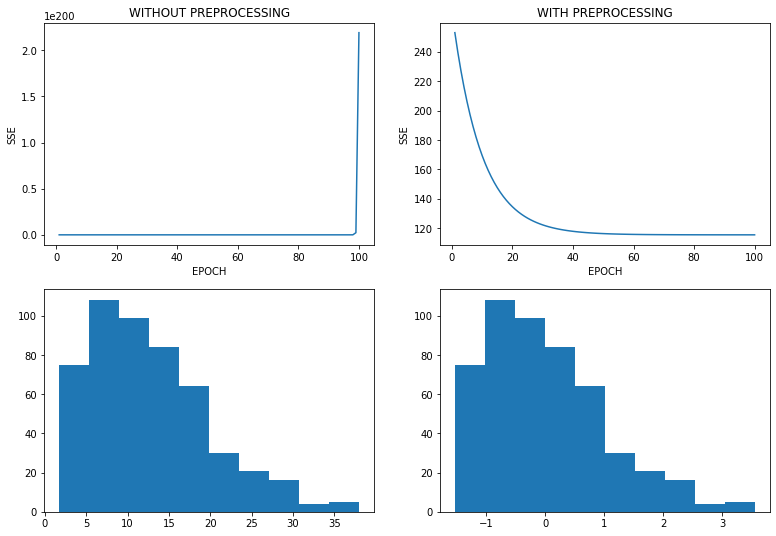

In [5]:
###############################_WITHOUT PREPROCESSING_#########################
alpha = 0.0001
w = np.zeros(1 + x.shape[1])  # a 1x2 zero matrix ---> x.shape[1] = 1
cost = []
epoch = 100

for i in range(epoch):
    y_pred = np.dot(x,w[1:])+ w[0]
    errors = y - y_pred
    
    w[1:] += alpha * x.T.dot(errors)
    w[0] += alpha * errors.sum()
    
    cost.append((errors**2).sum()/2)

plt.figure(figsize = (13,9))
plt.subplot(2,2,1)
plt.plot(range(1,epoch+1),cost)
plt.ylabel('SSE')
plt.xlabel('EPOCH')
plt.title('WITHOUT PREPROCESSING')

###############################_WITH PREPROCESSING_#########################
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y.reshape(-1,1)).flatten()

alpha = 0.0001
w = np.zeros(1 + x_.shape[1])  # a 1x2 zero matrix ---> x.shape[1] = 1
cost = []
epoch = 100

for i in range(epoch):
    y_pred1 = np.dot(x_,w[1:])+ w[0]
    errors = y_ - y_pred1
    
    w[1:] += alpha * x_.T.dot(errors)
    w[0] += alpha * errors.sum()
    
    cost.append((errors**2).sum()/2)

plt.subplot(2,2,2)
plt.plot(range(1,epoch+1),cost)
plt.ylabel('SSE')
plt.xlabel('EPOCH')
plt.title('WITH PREPROCESSING')

#######################_hist_################
plt.subplot(2,2,3)
plt.hist(x)


plt.subplot(2,2,4)
plt.hist(x_)


Analysis: 
>**without preprocessing**: At the beginning there is no error but at 100th eopch it increases suddenly, which is the sign of unstable model.Also there is a problem of scaling . the mean of hist plot of data without preprocessing is approx 10 (mean is not centered).

>**with preprocessing**: At start, error is high but as go to the 100th epoch it reduces. that means model is quite stable.The mean of hist plot of data with preprocessing is 0 (mean is centered).

# Data Preprocessing Methods:

    1.Standardization/Mean Removal
    2.min-max or scaling features to a range
    3.Normalization
    4.Binarization
    
**Assumptions of ML Algorithms:**
>The features follow normal distribution.

>Most methods are based on linear assumptions.

>Most of the ML methods require the data to be standard normally distributed, Gaussian with 0 mean and unit variance.

In [6]:
from sklearn import preprocessing

In [7]:
x_train = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]
    
])

In [8]:
x_train.mean(axis = 0) # columnwise mean

array([1.        , 0.        , 0.33333333])

## 1.Standardization/ mean removal/ Variance Scaling:

Mean is removed. Data is centered to 0. This is to remove bias.

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: **Gaussian with zero mean and unit variance.**

In [9]:
x_scaled = preprocessing.scale(x_train)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [10]:
x_scaled.mean(axis = 0)

array([0., 0., 0.])

In [11]:
x_scaled.std(axis = 0)

array([1., 1., 1.])

**When working with real dataset , if you scale your training data then you should also scale your test data as well.**

In [12]:
x_scaler = preprocessing.StandardScaler().fit(x_train)
x_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
x_scaler.mean_

array([1.        , 0.        , 0.33333333])

In [14]:
x_scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [15]:
x_scaler.transform(x_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

(array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 3 Lists of Patches objects>)

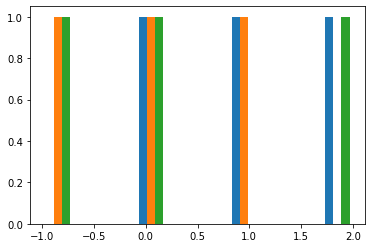

In [16]:
plt.figure(figsize = (6,4))
plt.hist(x_train)

In [17]:
x_test = [[-1.,1.,0.]]

In [18]:
x_scaler.transform(x_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

## 2.min-max or scaling features to a range:

Scaling features to lie b/w min and max values (or 0 and 1) so that the max absolute value of each feature is scaled to 1.

In [19]:
x_train = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]
    
])

### MinMaxScaler : scale the data to [0,1] range.

In [20]:
x_minmax = preprocessing.MinMaxScaler()

In [21]:
x_minmax.fit_transform(x_train)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [22]:
x_test = np.array([[-3.,-1.,0.],[2.,1.5,4.]]) # it exceeds the range of x_train data

In [23]:
x_minmax.transform(x_test) # scaling value also exceeds to 1 and lower than -1.

array([[-1.5       ,  0.        ,  0.33333333],
       [ 1.        ,  1.25      ,  1.66666667]])

In [24]:
preprocessing.MinMaxScaler?

#### preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
Docstring:     
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

The transformation is calculated as::

    X_scaled = scale * X + min - X.min(axis=0) * scale
    where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))

This transformation is often used as an alternative to zero mean,
unit variance scaling.

### MaxAbsScaler : scale the data to [-1,1] range.  < scaling sparse data>
(by dividing  to the max value feature)

In [25]:
x_train = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]
    
])

In [26]:
x_maxabs = preprocessing.MaxAbsScaler()
x_maxabs.fit_transform(x_train)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [27]:
x_test = np.array([[-1.,-0.5,2.],[0.,0.5,-0.6]])
x_maxabs.transform(x_test)

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

In [28]:
preprocessing.MaxAbsScaler?

**preprocessing.MaxAbsScaler(copy=True)**

Docstring:     
Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such
that the maximal absolute value of each feature in the
training set will be 1.0. It does not shift/center the data, and
thus does not destroy any sparsity.


## 3.Normalization:

Normalization is the process of scaling individual samples to have unit norm. 

This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

$X^{'} = \frac{X - X_{mean}}{X_{max} - X_{min}}$

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.



There are 2 types of normalization:

   >**1.L1 :** least absolute deviations ensures the sum of abs value is 1 in each row.
   
   >**2.L2 :** least squares ensures the sum of squares value is 1  . 

In [29]:
x = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]
    
])

In [30]:
x_norm = preprocessing.normalize(x,norm = 'l2')
x_norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [31]:
## by using api

x_n = preprocessing.Normalizer().fit(x)
x_n

Normalizer(copy=True, norm='l2')

In [32]:
x_n.transform(x)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

**preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)**

Docstring:
Scale input vectors individually to unit norm (vector length).

## 4.Binarizer:

Binarize data (set feature values to 0 or 1) according to a threshold.

Values greater than the threshold map to 1, while values less than or equal to the threshold map to 0. With the default threshold of 0, only positive values map to 1.

In [33]:
x = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]
    
])

In [34]:
x_bin = preprocessing.Binarizer().fit(x)
x_bin

Binarizer(copy=True, threshold=0.0)

In [35]:
x_bin.transform(x)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [36]:
# on changing threshold

x_bin = preprocessing.Binarizer(threshold=-0.5).fit(x)
x_bin.transform(x)

array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.]])

In [37]:
x_bin = preprocessing.Binarizer(threshold=2).fit(x)
x_bin.transform(x)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# Encoding Categorical Features

**LabelEncoder :** encode label(Categorical Features) into numbers.

In [38]:
label = ['USA','JAPAN','INDIA','SINGAPUR','NEPAL']

In [39]:
le = preprocessing.LabelEncoder()
le.fit_transform(label)

array([4, 1, 0, 3, 2], dtype=int64)

In [40]:
le.classes_

array(['INDIA', 'JAPAN', 'NEPAL', 'SINGAPUR', 'USA'], dtype='<U8')

In [41]:
for k,v in enumerate(le.classes_):
    print(v,':',k)

INDIA : 0
JAPAN : 1
NEPAL : 2
SINGAPUR : 3
USA : 4


In [42]:
test = ['JAPAN','HONG KONG','CHINA','AUSTRALIA']

In [43]:
src = le.fit_transform(test)
src

array([3, 2, 1, 0], dtype=int64)

In [44]:
for k,v in enumerate(le.classes_):
    print(v,':',k)

AUSTRALIA : 0
CHINA : 1
HONG KONG : 2
JAPAN : 3


**OneHotEncoding :** encode the numeric label into matrix.

In [45]:
oh = preprocessing.OneHotEncoder(sparse=False)
oh

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [46]:
src

array([3, 2, 1, 0], dtype=int64)

In [47]:
src2 = oh.fit_transform( src.reshape(-1,1))
print(src2)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [48]:
inv_src = oh.inverse_transform(src2)
print(inv_src)

[[3]
 [2]
 [1]
 [0]]


# Bias-Variance Tradeoff 

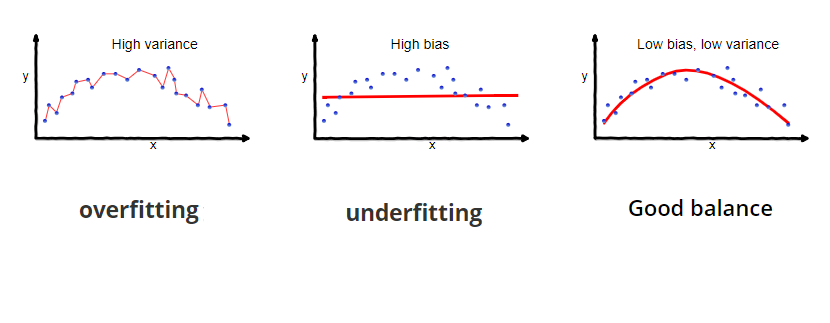

In [49]:
from IPython.display import Image

Image('D:\\PycharmProjects\\UdemyML\\img.png',width = 600)

**Bias** is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. (Underfitting)

**Variance** is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.(Overfitting)

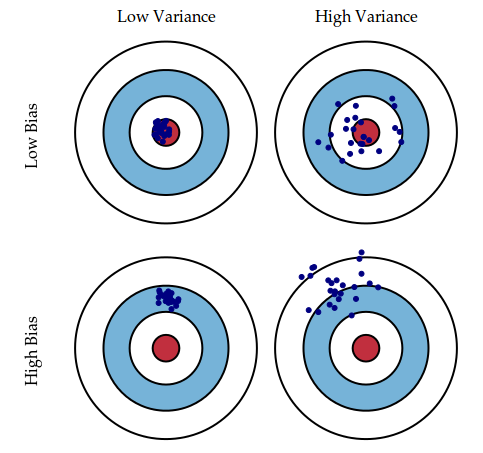

In [50]:
Image('D:\\PycharmProjects\\UdemyML\\img2.png',width = 400)

**Why Variance-bias Tradeoff ??**

If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.An algorithm can’t be more complex and less complex at the same time.

To build a good model, we need to find a good balance between bias and variance such that it minimizes the total error.
An optimal balance of bias and variance would never overfit or underfit the model.


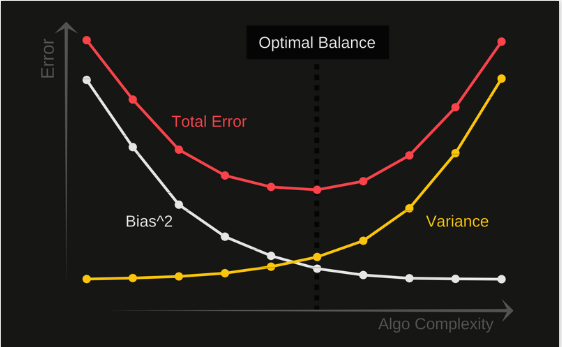

In [51]:
Image('D:\\PycharmProjects\\UdemyML\\img3.png',width = 400)

Bias and variance are inherent properties of estimators and we usually have to select learning algorithms and hyperparameters so that both bias and variance are as low as possible (see Bias-variance dilemma). Another way to reduce the variance of a model is to use more training data. However, you should only collect more training data if the true function is too complex to be approximated by an estimator with a lower variance.

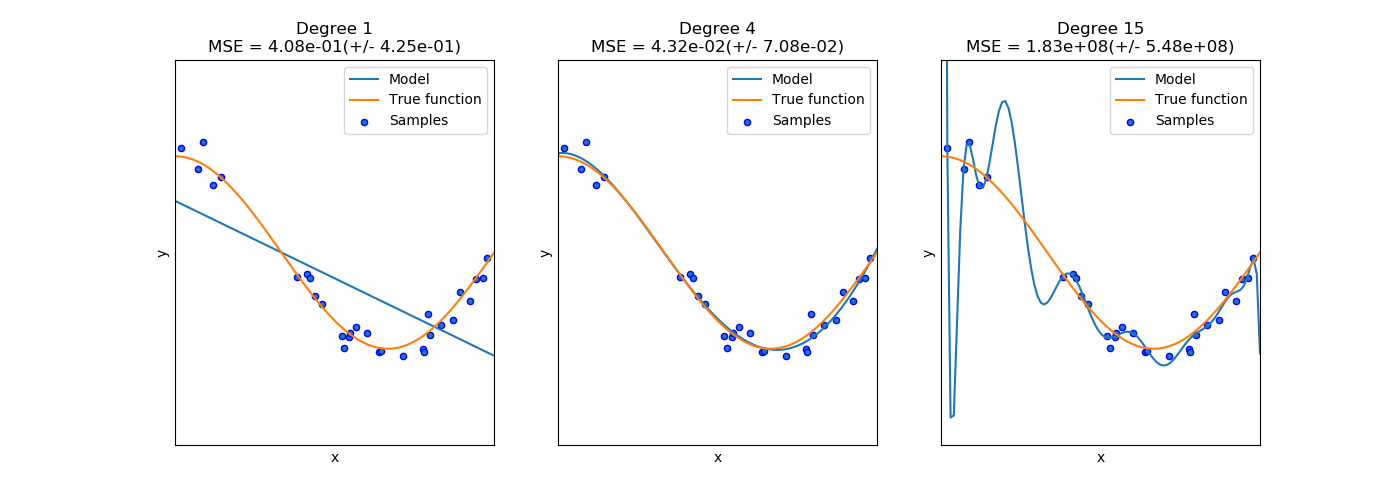

In [52]:
Image('D:\\PycharmProjects\\UdemyML\\img4.png',width = 900)

**We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data.**

# Validation Curve

    1. For identification of over and under fitting.
    2. Plotting training and validation score Vs model parameters.

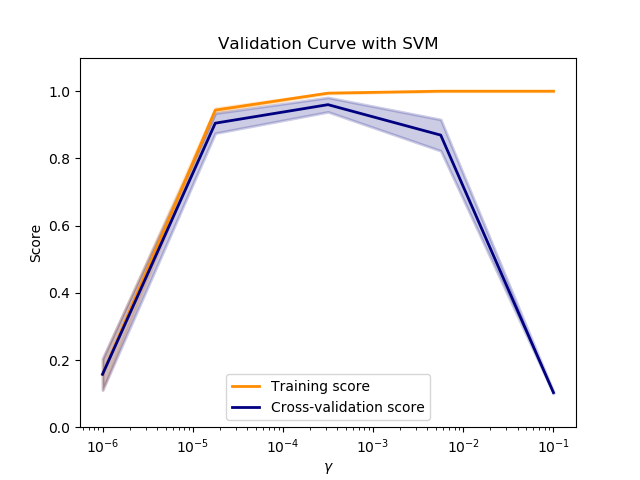

In [53]:
Image('D:\\PycharmProjects\\UdemyML\\img5.png',width = 400)

you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. 

>For very **low** values of gamma, you can see that both the training score and the validation score are low. This is called **underfitting**. 

>Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well.

>If gamma is **too high**, the classifier will **overfit**, which means that the training score is good but the validation score is poor.

# Learning Curve

>A learning curve shows the validation and training score of an estimator for varying numbers of training samples.

>It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

>if the validation score and the training score converge to a value that is quite low with increasing size of the training set. then we will probably not benefit much from more training data.




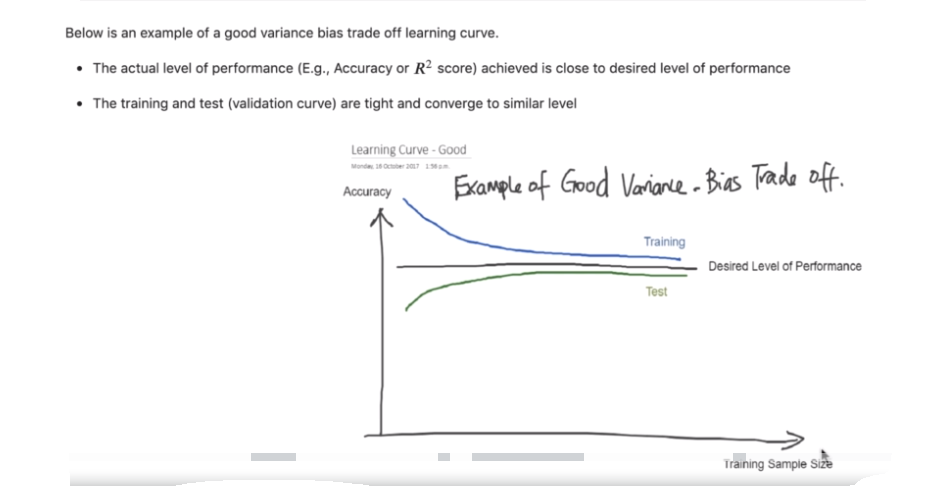

In [54]:
Image('D:\\PycharmProjects\\UdemyML\\img6.png',width = 800)

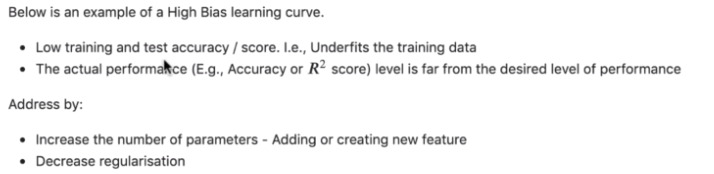

In [55]:
Image('D:\\PycharmProjects\\UdemyML\\img8.png',width = 700)

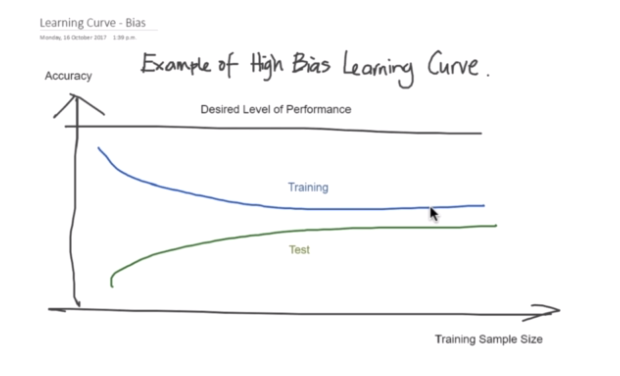

In [56]:
Image('D:\\PycharmProjects\\UdemyML\\img7.png',width = 500)

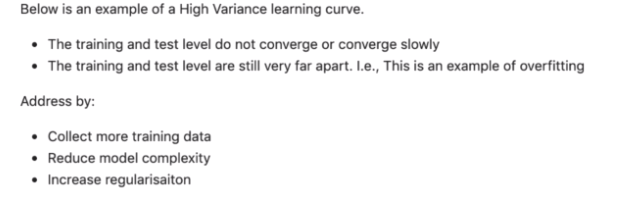

In [57]:
Image('D:\\PycharmProjects\\UdemyML\\img9.png',width = 700)

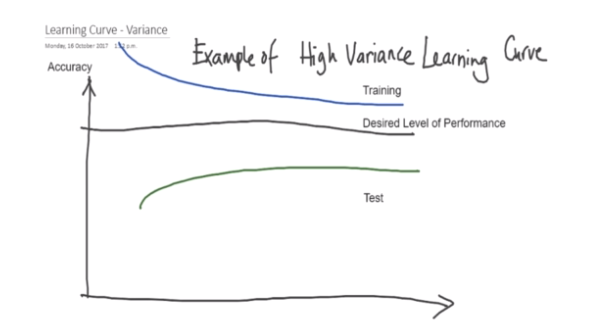

In [58]:
Image('D:\\PycharmProjects\\UdemyML\\img10.png',width = 500)

In general,

**Bias**: evaluated by score / accuracy level.

**Variance**: evaluated by the convergence speed and distance b/w training score/accuracy level and testing score/accuracy level .

In [59]:
### code for validation and learning curve by sklearn examples.

# Cross Validation

    1. k- fold CV
    2. Hold out CV
    3. Leave One Out

### K -fold CV :
training set is split into k smaller sets and The following procedure is followed for each of the k “folds”:
    
    1)A model is trained using k -1  of the folds as training data.

    2)the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

### LeaveOneOut (or LOO) :
a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set.

In [60]:
from sklearn.datasets import load_boston
data = load_boston()
df  = pd.DataFrame(data.data,columns = data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [61]:
X = df
Y = data.target

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state =42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

reg = svm.SVR(kernel = 'linear',C = 1)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

(303, 13) (203, 13)
(303,) (203,)


0.6684723978533983

#### Using CV:

In [63]:
reg = svm.SVR(kernel = 'linear',C = 1)
scores = cross_val_score(reg,X,Y,cv = 5) # accuracy of model after each fold
scores

array([0.77285459, 0.72771739, 0.56131914, 0.15056451, 0.08212844])

This model is not good as accuracy reduces after each fold validation.

The mean score and the 95% confidence score are evaluated as,

In [64]:
print("Accuracy: %0.2f(+/- %0.2f)"%(scores.mean(),scores.std()**2))

Accuracy: 0.46(+/- 0.08)


By default , score calculated at each CV iteration is the score method of calculation. it can be changed using scoring parameter.

In [65]:
scores = cross_val_score(reg,X,Y,cv = 5,scoring = 'neg_mean_squared_error')
scores

array([ -7.84451123, -24.78772444, -35.13272326, -74.50555945,
       -24.40465975])

#### when cv argument is integer , cross_val_score uses k-fold by default.

In [66]:

from sklearn.model_selection import KFold

X = ["a","b","c","d"]

kf = KFold(n_splits=2)
print(kf.get_n_splits(X))

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    


2
KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [67]:
from sklearn.model_selection import LeaveOneOut

X = [1,2,3,4]

loo = LeaveOneOut()
print(loo)

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    

LeaveOneOut()
TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


### Pipelining:

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm

X = df
Y = data.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state =42)
pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        svm.SVR(kernel = 'linear',C = 1))

pipe_svm.fit(x_train,y_train)
y_pred = pipe_svm.predict(x_test)
test_acc = pipe_svm.score(x_test,y_test)
test_acc

0.4290488809418034

In [69]:
c = cross_val_score(estimator = pipe_svm,
                   X = x_train,
                   y = y_train,
                   cv = 10,
                   n_jobs = 1)
print("cv score is:",c)


cv score is: [0.12229749 0.81533654 0.22154706 0.44216241 0.58052369 0.45321161
 0.2499796  0.57437736 0.44589733 0.24556636]


In [70]:
print("Accuracy: %0.3f(+/- %0.3f)"%(c.mean(),c.std()))

Accuracy: 0.415(+/- 0.199)
